**1.1 Chargement des données**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Chargement du dataset**

In [3]:
df_wind = pd.read_csv("T1.csv", parse_dates=["Date/Time"], index_col="Date/Time")

Colonne index : Date/Time
=> Justification : il s’agit d’une série temporelle, ce qui permet l’utilisation des méthodes resample, asfreq, slicing temporel, etc.

**1.2 Exploration des données**

**Taille du DataFrame**

In [5]:
df_wind.shape

(50530, 4)

**Affichage des premières et dernières lignes**

In [5]:
df_wind.head(5)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
df_wind.tail(5)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


Les données sont enregistrées à des intervalles réguliers de 10 minutes

Le dataset couvre l’année 2018

**Types des colonnes**

In [7]:
df_wind.dtypes

,0
LV ActivePower (kW),float64
Wind Speed (m/s),float64
Theoretical_Power_Curve (KWh),float64
Wind Direction (°),float64


**Vérification valeurs manquantes**

In [9]:
df_wind.isnull().sum()

,0
LV ActivePower (kW),0
Wind Speed (m/s),0
Theoretical_Power_Curve (KWh),0
Wind Direction (°),0


**Conversion Numpy**

In [48]:
wind_speed = df_wind["Wind Speed (m/s)"].to_numpy()
wind_speed

array([5.31133604, 5.67216682, 5.2160368 , ..., 8.43535805, 9.42136574,
       9.97933197])

**Moyenne et écart-type de la vitesse du vent**

In [11]:
df_wind["Wind Speed (m/s)"].mean()

np.float64(7.557952236083194)

In [12]:
df_wind["Wind Speed (m/s)"].std()

4.227166055611571

**1.3 Manipulation des données**

**Renommage des colonnes**

In [6]:
df_wind.rename(columns={
    "LV ActivePower (kW)": "Power",
    "Wind Speed (m/s)": "Wind speed",
    "Theoretical_Power_Curve (KWh)": "Theoretical power",
    "Wind Direction (°)": "Wind direction"
}, inplace=True)

**Puissance produite en fonction du temps**

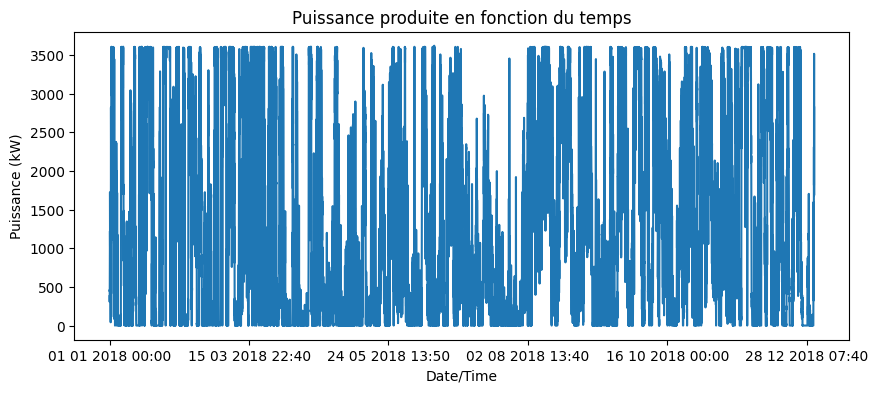

In [53]:
df_wind["Power"].plot(figsize=(10,4))
plt.title("Puissance produite en fonction du temps")
plt.ylabel("Puissance (kW)")
plt.show()

**Calcul de la perte d’énergie**

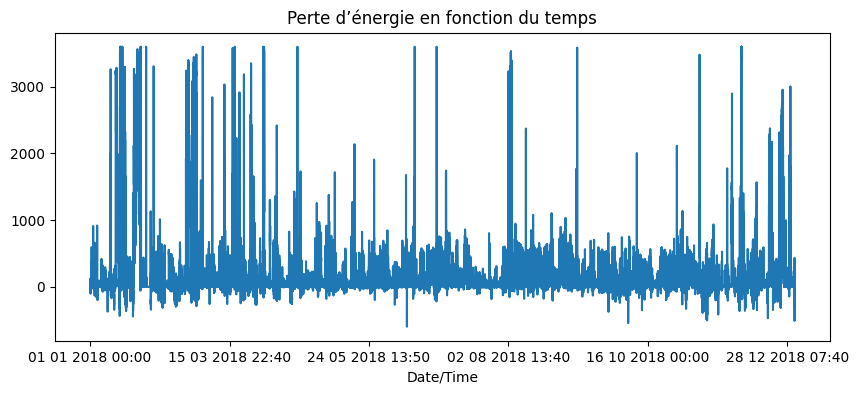

In [8]:
df_wind["loss"] = df_wind["Theoretical power"] - df_wind["Power"]
df_wind["loss"].plot(figsize=(10,4))
plt.title("Perte d’énergie en fonction du temps")
plt.show()

Les pertes sont importantes lors de certaines périodes

Possibles arrêts techniques ou contraintes physiques

**Détection des périodes de maintenance**

In [9]:
maintenance = df_wind[(df_wind["Wind speed"] > 3.3) & (df_wind["Power"] <= 0)]
maintenance

,Power,Wind speed,Theoretical power,Wind direction,loss
Date/Time,,,,,
03 01 2018 15:40,0.0,3.743307,83.986265,245.068207,83.986265
03 01 2018 17:00,0.0,3.907811,110.979604,241.973099,110.979604
04 01 2018 13:50,0.0,3.441704,45.742725,79.094109,45.742725
04 01 2018 14:40,0.0,3.395320,41.152466,97.738426,41.152466
04 01 2018 14:50,0.0,3.413509,42.911453,101.699898,42.911453
...,...,...,...,...,...
31 12 2018 01:10,0.0,3.922822,113.658339,124.522797,113.658339
31 12 2018 11:50,0.0,3.916592,112.542195,78.961700,112.542195
31 12 2018 12:50,0.0,3.861320,102.912015,75.005074,102.912015


**Comparaison des pertes**

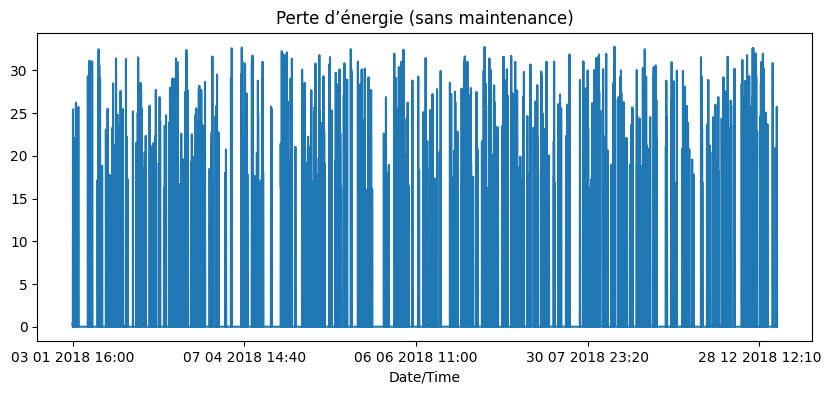

In [10]:
df_wind_nm = df_wind[~(df_wind["Wind speed"] > 3.3) & (df_wind["Power"] <= 0)]
df_wind_nm["loss"].plot(figsize=(10,4))
plt.title("Perte d’énergie (sans maintenance)")
plt.show()

**Différence des pertes**

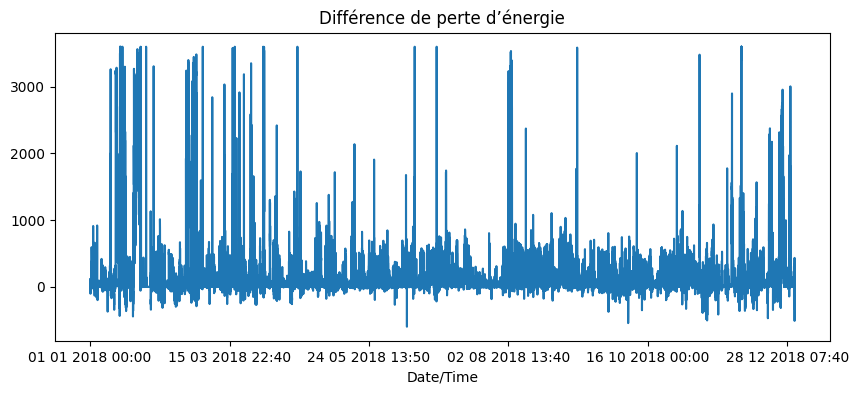

In [11]:
(df_wind["loss"] - df_wind_nm["loss"].mean()).plot(figsize=(10,4))
plt.title("Différence de perte d’énergie")
plt.show()

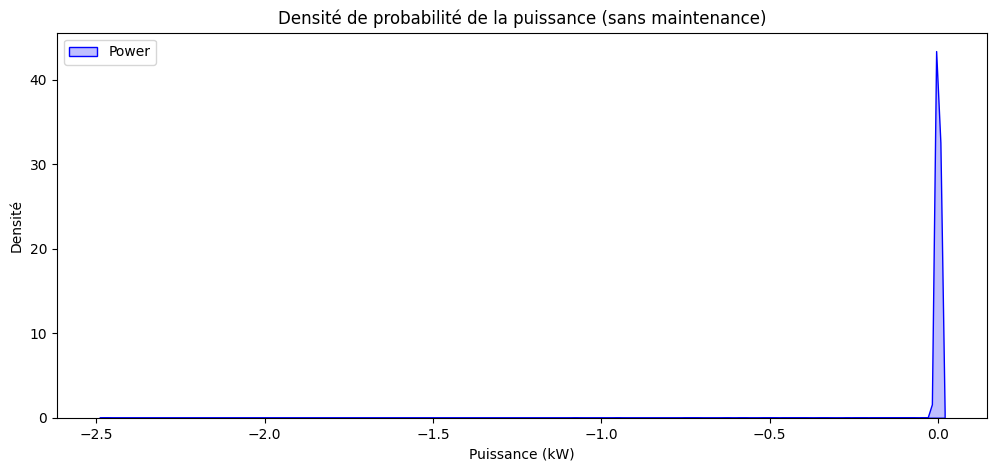

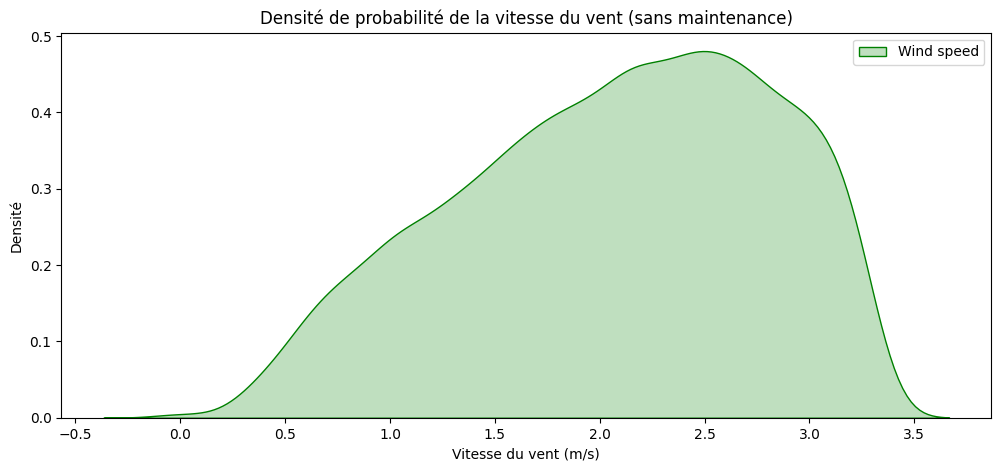

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la densité de probabilité (KDE) pour Power
plt.figure(figsize=(12,5))
sns.kdeplot(df_wind_nm['Power'], fill=True, color='blue', label='Power')
plt.xlabel('Puissance (kW)')
plt.ylabel('Densité')
plt.title('Densité de probabilité de la puissance (sans maintenance)')
plt.legend()
plt.show()

# Tracer la densité de probabilité (KDE) pour Wind speed
plt.figure(figsize=(12,5))
sns.kdeplot(df_wind_nm['Wind speed'], fill=True, color='green', label='Wind speed')
plt.xlabel('Vitesse du vent (m/s)')
plt.ylabel('Densité')
plt.title('Densité de probabilité de la vitesse du vent (sans maintenance)')
plt.legend()
plt.show()

La KDE de Power permet de voir les valeurs les plus fréquentes de puissance produite par l’éolienne.

La KDE de Wind speed montre la distribution des vitesses du vent pendant les périodes où l’éolienne était opérationnelle.

La maintenance impacte fortement la production

**Composantes x et y du vent**

In [13]:
maintenancecopy = (df_wind["Wind speed"] > 3.3) & (df_wind["Power"] <= 0)
df_wind_nm = df_wind.loc[~maintenancecopy].copy()
radians = np.deg2rad(df_wind_nm["Wind direction"])
df_wind_nm["x"] = df_wind_nm["Wind speed"] * np.cos(radians)
df_wind_nm["y"] = df_wind_nm["Wind speed"] * np.sin(radians)



**Rééchantillonnage**

In [14]:
df_wind_nm.index = pd.to_datetime(df_wind_nm.index, dayfirst=True)
hourly  = df_wind_nm.resample("h").mean()
daily   = df_wind_nm.resample("d").mean()
weekly  = df_wind_nm.resample("W").mean()
monthly = df_wind_nm.resample("ME").mean()


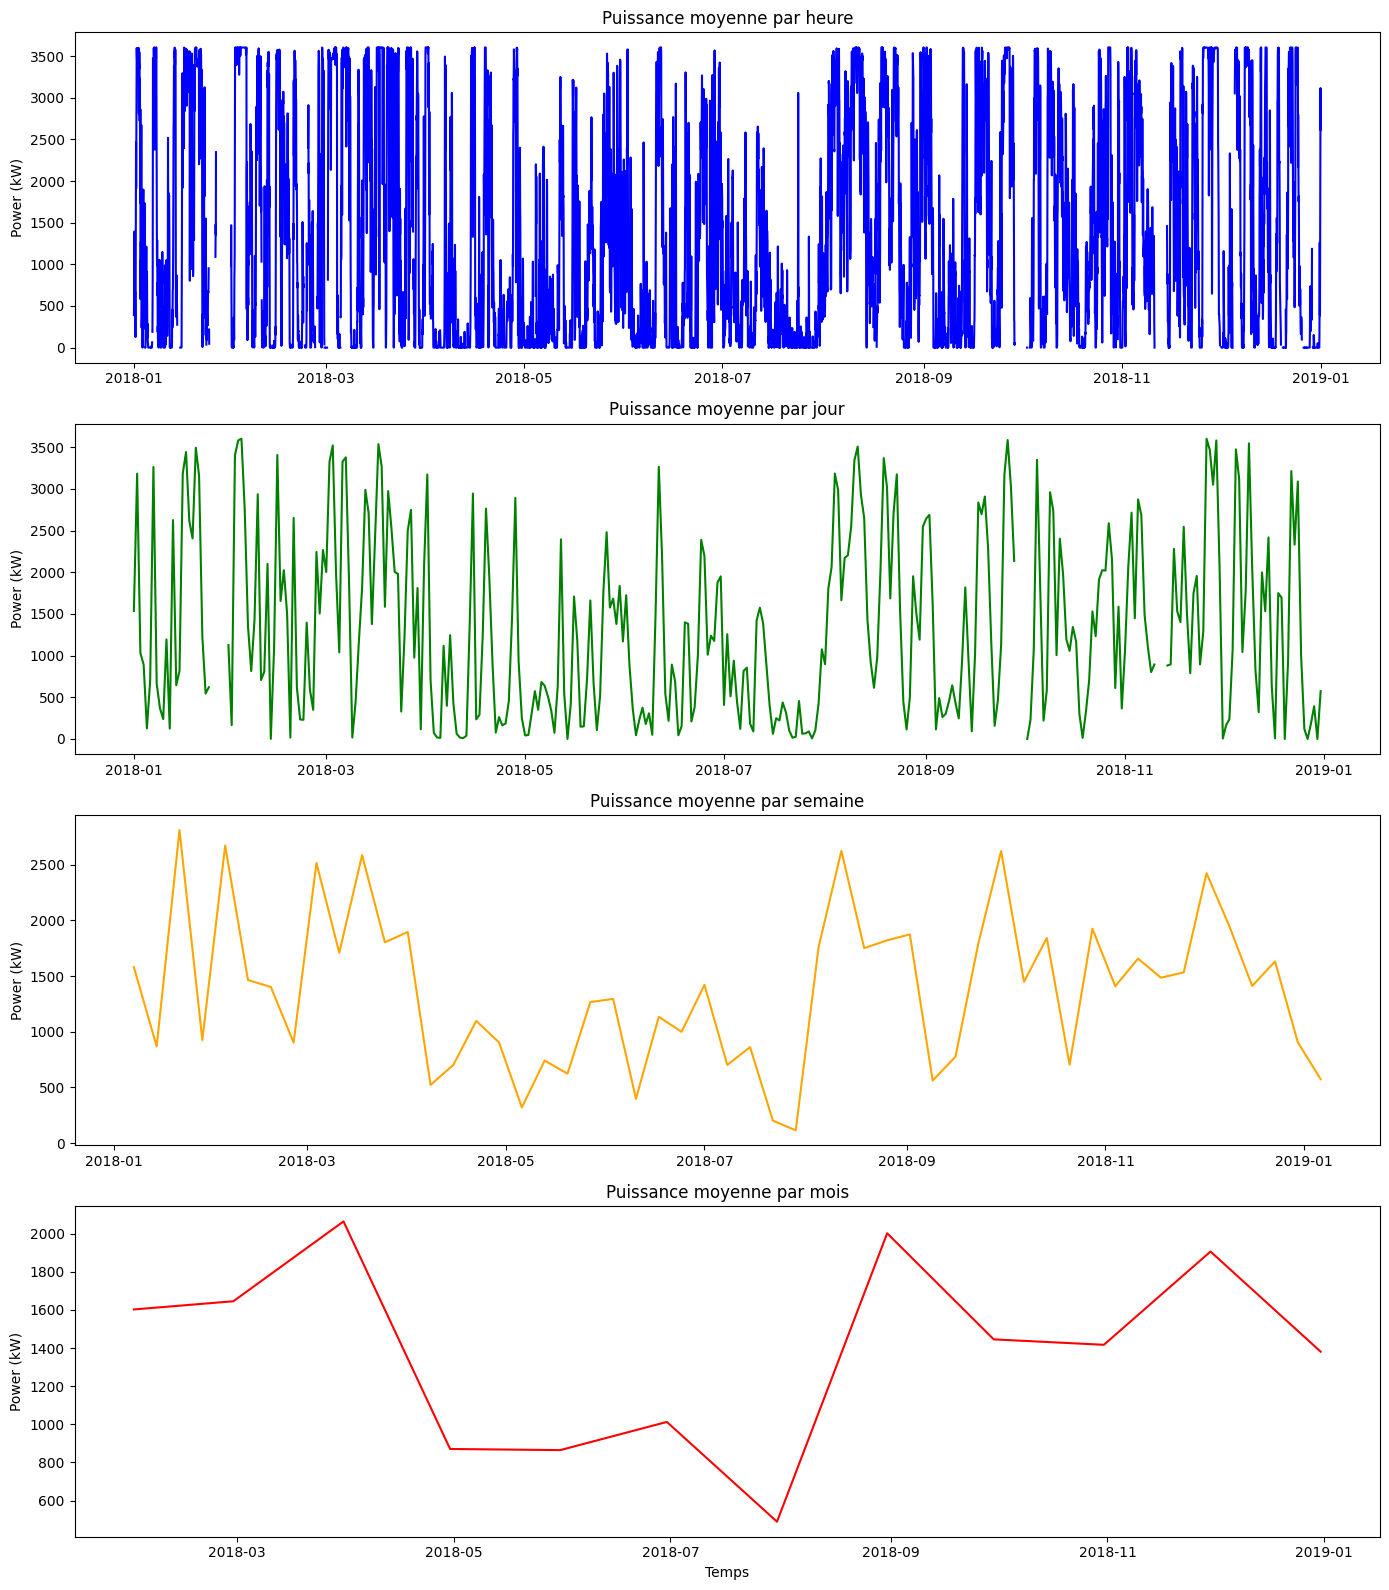

In [16]:
import matplotlib.pyplot as plt

# Préparer les sous-plots
fig, axs = plt.subplots(4, 1, figsize=(14, 16), sharex=False)

# 1️⃣ Puissance horaire
axs[0].plot(hourly.index, hourly['Power'], color='blue')
axs[0].set_title('Puissance moyenne par heure')
axs[0].set_ylabel('Power (kW)')

# 2️⃣ Puissance journalière
axs[1].plot(daily.index, daily['Power'], color='green')
axs[1].set_title('Puissance moyenne par jour')
axs[1].set_ylabel('Power (kW)')

# 3️⃣ Puissance hebdomadaire
axs[2].plot(weekly.index, weekly['Power'], color='orange')
axs[2].set_title('Puissance moyenne par semaine')
axs[2].set_ylabel('Power (kW)')

# 4️⃣ Puissance mensuelle
axs[3].plot(monthly.index, monthly['Power'], color='red')
axs[3].set_title('Puissance moyenne par mois')
axs[3].set_ylabel('Power (kW)')
axs[3].set_xlabel('Temps')

plt.tight_layout()
plt.show()


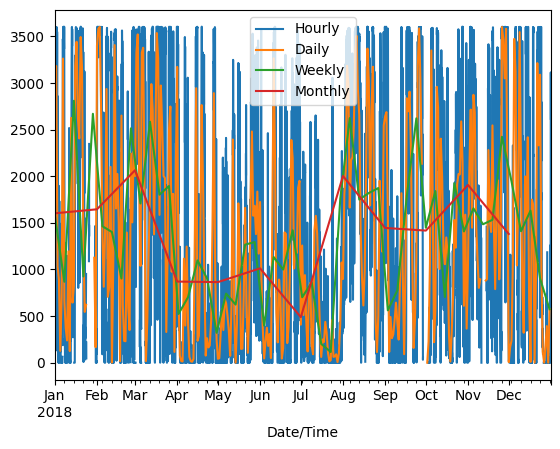

In [15]:
hourly["Power"].plot(label="Hourly")
daily["Power"].plot(label="Daily")
weekly["Power"].plot(label="Weekly")
monthly["Power"].plot(label="Monthly")
plt.legend()
plt.show()


resample → agrégation (mean, sum…)

asfreq → changement de fréquence sans calcul

**Interpolation**

In [17]:
hourly.interpolate(inplace=True)
daily.interpolate(inplace=True)
weekly.interpolate(inplace=True)
monthly.interpolate(inplace=True)


In [85]:
monthly

,Power,Wind speed,Theoretical power,Wind direction,loss,x,y,Direction
Date/Time,,,,,,,,
2018-01-31,1602.822869,8.496527,1814.750234,172.883059,211.927366,-3.633398,-1.342884,N
2018-02-28,1645.812762,8.759004,1744.093098,145.658523,98.280336,-3.824065,0.967198,N
2018-03-31,2064.831027,10.015980,2169.568175,192.239298,104.737148,-7.225587,-3.115617,N
2018-04-30,870.459599,5.866998,969.273998,99.745845,98.814398,1.574577,3.347610,N
2018-05-31,864.535626,5.910396,983.221424,136.145862,118.685797,1.723209,1.676957,N
2018-06-30,1012.423729,6.382064,1155.494691,130.287926,143.070961,0.892749,2.361215,N
2018-07-31,488.728902,4.977602,594.379330,120.142842,105.650427,2.430079,1.725352,N
2018-08-31,2002.627641,9.358999,2225.993224,52.580255,223.365582,5.435567,7.190290,N
2018-09-30,1445.749318,7.622922,1568.465346,97.598273,122.716028,3.740699,4.491161,N


**Direction catégorielle**

In [18]:
def direction(x):
  if x > 348.75 or x<11.25: return 'N'
  if x < 33.75: return 'NNE'
  if x < 56.25: return 'NE'
  if x < 78.75: return 'ENE'
  if x < 101.25: return 'E'
  if x < 123.75: return 'ESE'
  if x < 146.25: return 'SE'
  if x < 168.75: return 'SSE'
  if x < 191.25: return 'S'
  if x < 213.75: return 'SSW'
  if x < 236.25: return 'SW'
  if x < 258.75: return 'WSW'
  if x < 281.25: return 'W'
  if x < 303.75: return 'WNW'
  if x < 326.25: return 'NW'
  else: return 'NNW'

for df in [daily, weekly, monthly]:
    df["Direction"] = df["Wind speed"].apply(direction)

**Decembre**

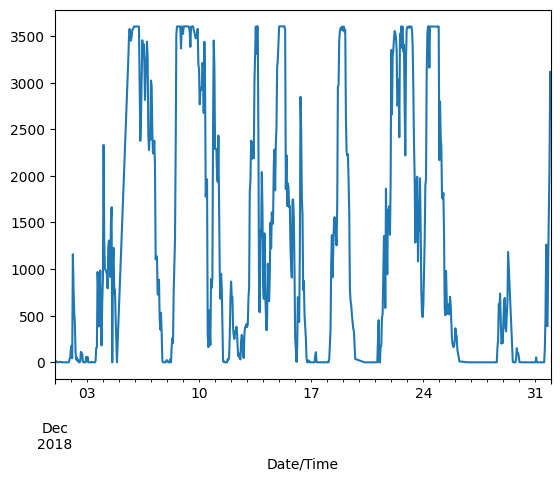

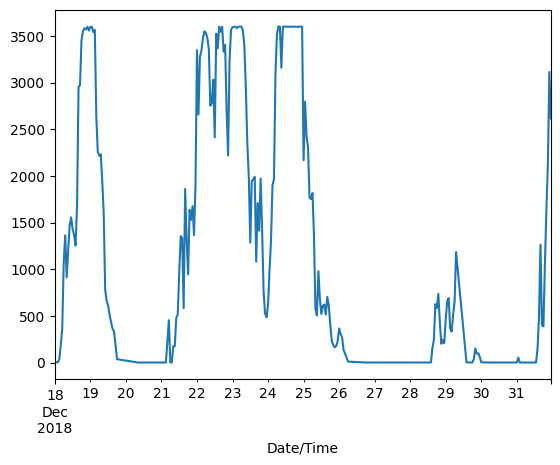

In [19]:
december = hourly.loc['2018-12']
december["Power"].plot()
plt.show()

december[-336:]["Power"].plot()  # 2 dernières semaines
plt.show()

**Moyennes hebdomadaires et mensuelles**

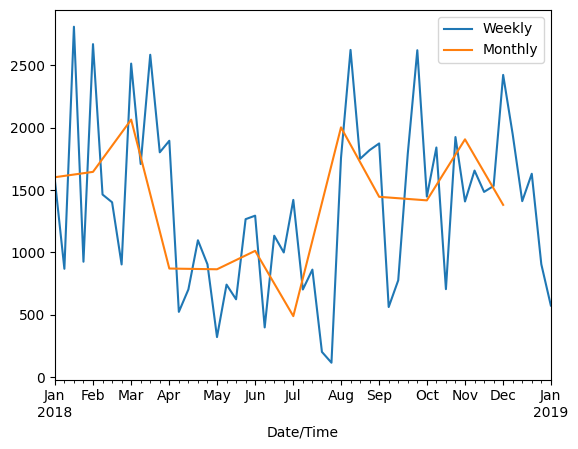

In [20]:
weekly["Power"].plot(label="Weekly")
monthly["Power"].plot(label="Monthly")
plt.legend()
plt.show()

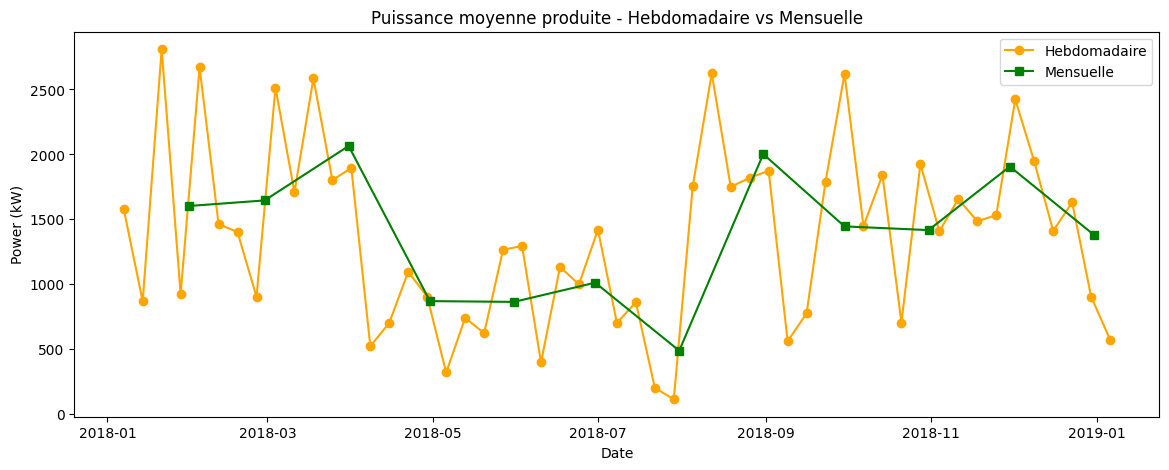

In [21]:
plt.figure(figsize=(14,5))
plt.plot(weekly.index, weekly['Power'], marker='o', color='orange', label='Hebdomadaire')
plt.plot(monthly.index, monthly['Power'], marker='s', color='green', label='Mensuelle')
plt.title('Puissance moyenne produite - Hebdomadaire vs Mensuelle')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

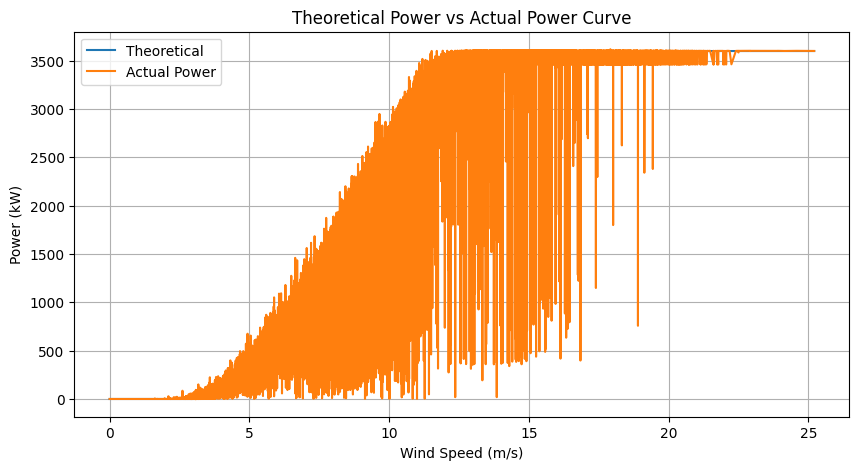

In [91]:
m_s_t_se = df_wind_nm.groupby('Wind speed')['Theoretical power'].mean()
m_s_p_se = df_wind_nm.groupby('Wind speed')['Power'].mean()
plt.figure(figsize=(10,5))
plt.plot(m_s_t_se,label='Theoretical')
plt.plot(m_s_p_se,label='Actual Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs Actual Power Curve')
plt.grid()
plt.legend()
plt.show()


La courbe orange (réelle) est globalement en dessous de la courbe bleue (théorique). Cela indique que, pour une même vitesse de vent, l'éolienne produit souvent moins que ce qu'elle "devrait" produire selon le constructeur. Cela peut être dû à :

L'usure mécanique ou la dégradation des pales.

Des conditions environnementales (densité de l'air, turbulences).

Un alignement imparfait face au vent (Yaw error).

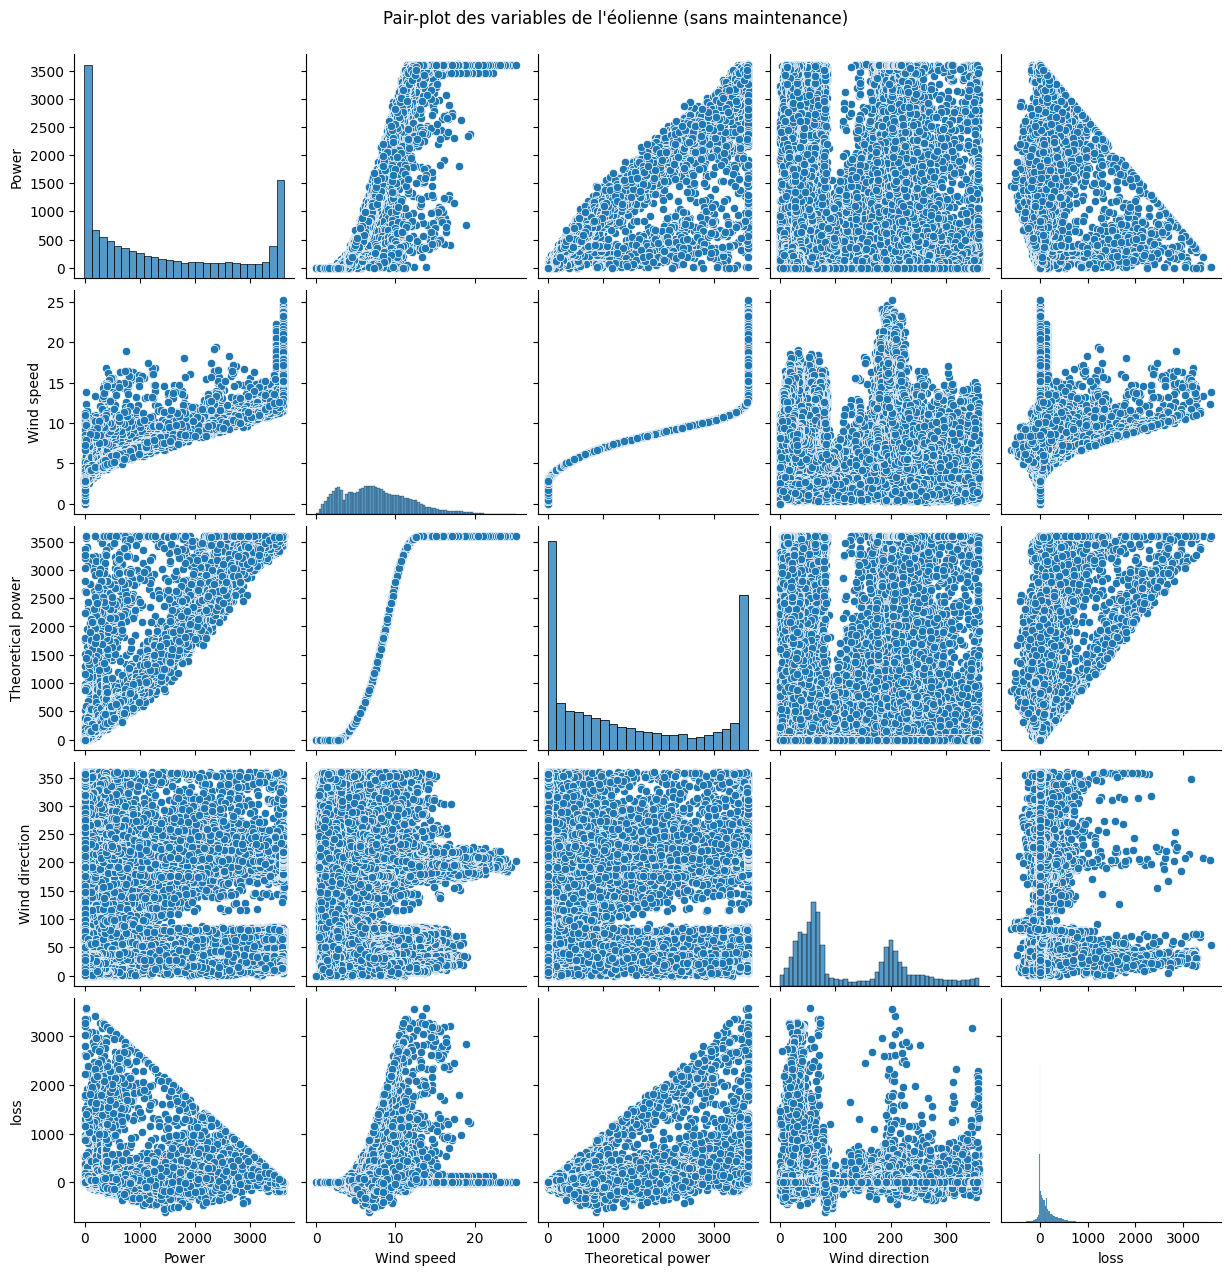

In [22]:
# Sélectionner les colonnes numériques pertinentes
cols = ['Power', 'Wind speed', 'Theoretical power', 'Wind direction', 'loss']

# Créer le pair-plot
sns.pairplot(df_wind_nm[cols])
plt.suptitle('Pair-plot des variables de l\'éolienne (sans maintenance)', y=1.02)
plt.show()

**Interprétation**

Corrélation entre Power et Wind speed
--

On observe que la puissance augmente avec la vitesse du vent, surtout pour des vitesses supérieures au seuil de démarrage (~3,3 m/s).

Power vs Theoretical power
--

La puissance réelle suit globalement la courbe théorique, mais avec quelques écarts (différences visibles dans le nuage).

Wind direction
--
La direction du vent semble avoir peu d’impact direct sur la puissance, car les points sont largement dispersés horizontalement pour un même niveau de puissance.

Loss (perte d’énergie)
--

La perte d’énergie est plus élevée pour certaines vitesses de vent intermédiaires, probablement quand la production réelle est inférieure à la théorie.

Relations linéaires et non linéaires
--

Certaines variables comme Power et Theoretical power montrent une relation quasi-linéaire croissante.

D’autres relations (ex : Wind direction vs Power) semblent non corrélées.


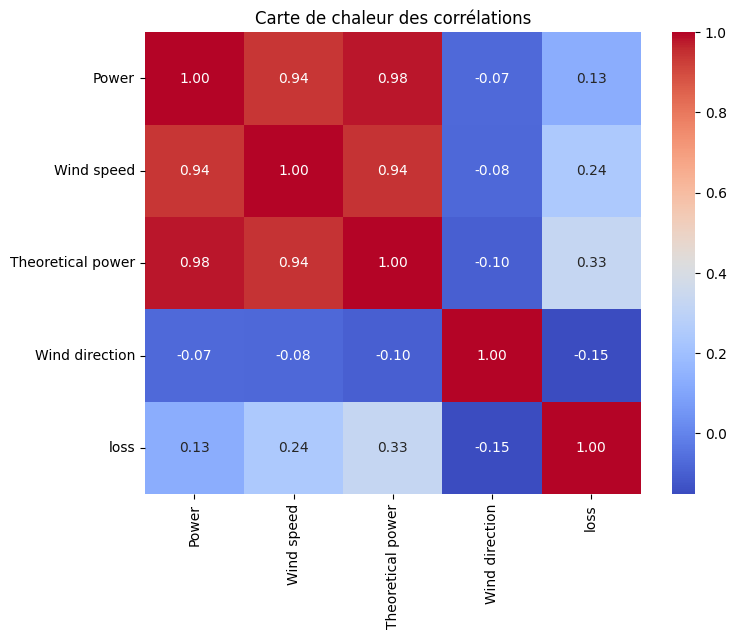

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques pertinentes
cols = ['Power', 'Wind speed', 'Theoretical power', 'Wind direction', 'loss']

# Calculer la matrice de corrélation
corr_matrix = df_wind_nm[cols].corr()

# Tracer la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Carte de chaleur des corrélations')
plt.show()

**Interprétation **
--

Variables fortement corrélées avec Power
--

Power et Theoretical power → corrélation très élevée (≈ 0,98), ce qui montre que la production suit globalement la théorie.

Power et Wind speed → corrélation positive forte (≈ 0,94), ce qui confirme que plus le vent est fort, plus la puissance est élevée.

Variables peu ou pas corrélées avec Power
--

Wind direction → corrélation proche de 0 avec Power. Cela signifie que la direction du vent n’a pas d’impact direct sur la puissance produite.



Observations générales
--

Les corrélations permettent d’identifier quelles variables influencent directement la production (Wind speed et Theoretical power) et lesquelles ont un effet négligeable (Wind direction).

Cela peut guider l’analyse et la modélisation de la production d’énergie.

**Variables ayant une corrélation forte avec Power**

D’après la matrice de corrélation classique (Pearson) :

Theoretical power → corrélation très élevée (~0,98)

Wind speed → corrélation forte (~0,94)

**Variables peu ou pas corrélées avec Power**

Wind direction → corrélation proche de 0 → pas d’effet direct sur la puissance


**Autres méthodes de corrélation**

Kendall Tau et Spearman :
--

Ces méthodes sont basées sur les rangs plutôt que sur les valeurs exactes.

Elles sont donc moins sensibles aux valeurs extrêmes et aux distributions non linéaires.

Les résultats seront globalement cohérents pour les relations monotones (ex : Power vs Wind speed ou Theoretical power), mais :

Les coefficients numériques peuvent être légèrement différents.

Si la relation est très linéaire, Pearson et Spearman/Kendall donnent des résultats très proches.

Si la relation est monotone mais non linéaire, Spearman/Kendall peuvent mieux refléter la tendance.

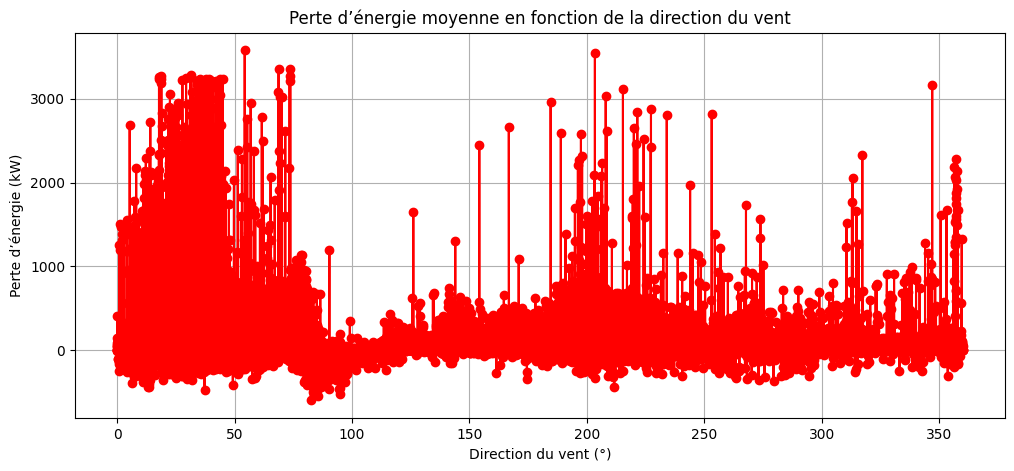

In [24]:
# Groupement par direction du vent avec moyenne
loss_by_direction = df_wind_nm.groupby('Wind direction')['loss'].mean()

# Tracer la perte moyenne en fonction de la direction
plt.figure(figsize=(12,5))
plt.plot(loss_by_direction.index, loss_by_direction.values, marker='o', color='red')
plt.title('Perte d’énergie moyenne en fonction de la direction du vent')
plt.xlabel('Direction du vent (°)')
plt.ylabel('Perte d’énergie (kW)')
plt.grid(True)
plt.show()

La perte d’énergie varie selon la direction du vent.

Certaines directions correspondent à des pertes plus importantes, ce qui peut refléter des conditions locales ou un positionnement suboptimal de l’éolienne.

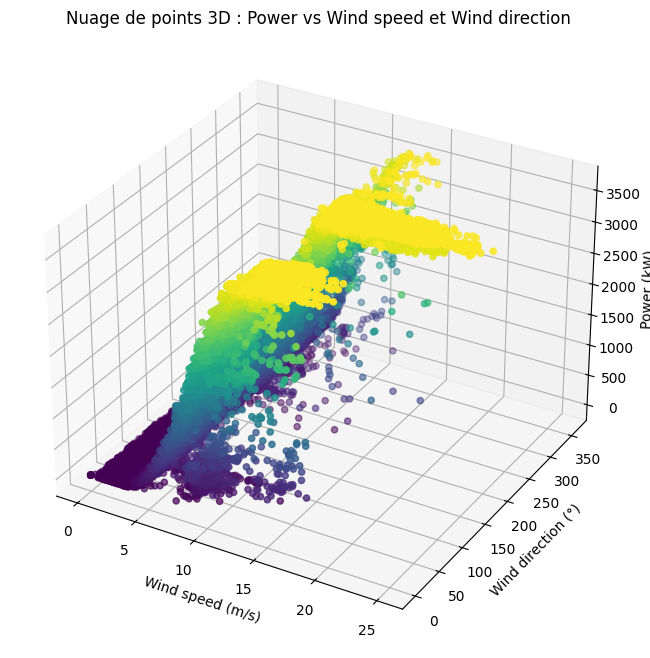

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Préparer la figure 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points
ax.scatter(
    df_wind_nm['Wind speed'],
    df_wind_nm['Wind direction'],
    df_wind_nm['Power'],
    c=df_wind_nm['Power'], cmap='viridis', s=20
)

# Étiquettes des axes
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('Wind direction (°)')
ax.set_zlabel('Power (kW)')
ax.set_title('Nuage de points 3D : Power vs Wind speed et Wind direction')

plt.show()


**Interprétation **

Dépendance principale sur la vitesse du vent
--

On observe que la puissance augmente clairement avec la vitesse du vent, confirmant que c’est le facteur principal.

Effet de la direction du vent
--

Pour une vitesse donnée, la puissance varie très peu selon la direction → la direction du vent a un impact secondaire sur la production.

Les valeurs de Power sont concentrées autour d’un même plan pour chaque vitesse de vent.

Zones de performance optimale
--

Pour les vitesses modérées à élevées, la puissance réelle se rapproche de la puissance théorique.

Les points plus bas indiquent des pertes ponctuelles ou des périodes proches du seuil de démarrage.